# **Lab1: Regression**
In *lab 1*, you need to finish:

1.  Basic Part: Implement the regression model to predict people's grip force from their weight.
You can use either Matrix Inversion or Gradient Descent.


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implementing a regression model to predict grip force in a different way (for example, with more variables) than the basic part




---
# 1. Basic Part (50%)
In the first part, you need to implement the regression to predict grip force

Please save the prediction result in a CSV file and submit it to Kaggle

### Import Packages

> Note: You **cannot** import any other package


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

### Global attributes
Define the global attributes\
You can also add your own global attributes here

In [63]:
training_dataroot = 'lab1_basic_training.csv' # Training data file file named as 'lab1_basic_training.csv'
testing_dataroot = 'lab1_basic_testing.csv'   # Testing data file named as 'lab1_basic_testing.csv'
output_dataroot = 'lab1_basic.csv' # Output file will be named as 'lab1_basic.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be a list with 100 elements

### Load the Input File
First, load the basic input file **lab1_basic_training.csv** and **lab1_basic_testing.csv**

Input data would be stored in *training_datalist* and *testing_datalist*

In [64]:
# Read input csv to datalist
with open(training_dataroot, newline="") as csvfile:
    training_datalist = pd.read_csv(training_dataroot).to_numpy()

with open(testing_dataroot, newline="") as csvfile:
    testing_datalist = pd.read_csv(testing_dataroot).to_numpy()

# --- DEBUG ---
print(training_datalist)
print(testing_datalist)

[[ 55.4      32.8    ]
 [ 53.6      39.4    ]
 [ 78.4      52.6    ]
 ...
 [ 65.3      46.     ]
 [ 62.7     125.68257]
 [ 59.7      38.9    ]]
[[ 53.6 ]
 [ 51.54]
 [ 79.7 ]
 [ 56.68]
 [ 68.5 ]
 [ 64.8 ]
 [ 57.4 ]
 [ 63.5 ]
 [ 63.3 ]
 [ 61.4 ]
 [ 69.9 ]
 [ 92.5 ]
 [ 83.1 ]
 [ 51.3 ]
 [ 64.5 ]
 [ 64.2 ]
 [ 64.8 ]
 [ 57.3 ]
 [ 55.5 ]
 [ 67.4 ]
 [ 84.  ]
 [ 66.4 ]
 [ 84.8 ]
 [ 82.3 ]
 [ 51.4 ]
 [ 91.4 ]
 [ 77.7 ]
 [ 56.4 ]
 [ 66.3 ]
 [ 52.8 ]
 [ 82.9 ]
 [ 68.9 ]
 [ 64.2 ]
 [ 64.1 ]
 [ 76.1 ]
 [ 57.72]
 [ 45.22]
 [ 90.6 ]
 [ 44.1 ]
 [ 60.9 ]
 [ 50.3 ]
 [ 69.  ]
 [ 79.8 ]
 [ 59.6 ]
 [ 51.5 ]
 [ 78.7 ]
 [ 56.4 ]
 [ 53.6 ]
 [ 52.1 ]
 [ 66.4 ]
 [ 75.2 ]
 [ 56.  ]
 [ 60.  ]
 [ 69.1 ]
 [ 62.  ]
 [ 73.5 ]
 [ 59.8 ]
 [ 79.1 ]
 [ 52.9 ]
 [ 85.  ]
 [ 82.6 ]
 [ 48.8 ]
 [ 84.6 ]
 [ 80.4 ]
 [ 73.5 ]
 [ 86.7 ]
 [ 57.8 ]
 [ 49.2 ]
 [ 84.4 ]
 [ 65.5 ]
 [ 89.9 ]
 [ 66.96]
 [ 85.1 ]
 [ 79.7 ]
 [104.9 ]
 [ 54.28]
 [ 56.5 ]
 [ 68.5 ]
 [ 76.92]
 [ 97.  ]
 [ 67.1 ]
 [ 72.5 ]
 [ 63.3 ]
 [ 63.9 ]
 [ 72.8 ]
 [ 65.

### Implement the Regression Model

> Note: It is recommended to use the functions we defined, you can also define your own functions

#### Step 1: Split Data
Split data in *training_datalist* into training dataset and validation dataset


In [2]:
def SplitData(data, split_ratio):
    """
    Splits the given dataset into training and validation sets based on the specified split ratio.

    Parameters:
    - data (numpy.ndarray): The dataset to be split. It is expected to be a 2D array where each row represents a data point and each column represents a feature.
    - split_ratio (float): The ratio of the data to be used for training. For example, a value of 0.8 means 80% of the data will be used for training and the remaining 20% for validation.

    Returns:
    - training_data (numpy.ndarray): The portion of the dataset used for training.
    - validation_data (numpy.ndarray): The portion of the dataset used for validation.

    """
    training_data = []
    validation_data = []

    # TODO - Done
    data_size = len(data)
    training_data = data[: math.floor(data_size * split_ratio)]
    validation_data = data[math.floor(data_size * split_ratio) :]

    return training_data, validation_data

#### Step 2: Preprocess Data
Handle unreasonable data and missing data

> Hint 1: Outliers and missing data can be addressed by either removing them or replacing them using statistical methods (e.g., the mean of all data).

> Hint 2: Missing data are represented as `np.nan`, so functions like `np.isnan()` can be used to detect them.

> Hint 3: Methods such as the Interquartile Range (IQR) can help detect outliers

In [66]:
def PreprocessDataBasic(data):
    """
    Preprocess the given dataset and return the result.

    Parameters:
    - data (numpy.ndarray): The dataset to preprocess. It is expected to be a 2D array where each row represents a data point and each column represents a feature.

    Returns:
    - preprocessedData (numpy.ndarray): Preprocessed data.
    """
    preprocessedData = data

    # TODO
    print(f"{preprocessedData=}")

    data_removed_nan = np.array(
        [i for i in preprocessedData if not np.isnan(i[0]) and not np.isnan(i[1])]
    )

    (x_mean, y_mean) = np.mean(data_removed_nan, axis=0).tolist()
    print(f"{(x_mean, y_mean)=}")

    x_q25, x_q50, x_q75 = np.percentile(data_removed_nan[:, 0], [25, 50, 75]).tolist()
    y_q25, y_q50, y_q75 = np.percentile(data_removed_nan[:, 1], [25, 50, 75]).tolist()
    print(f"{(x_q25, x_q75)=}, {(y_q25, y_q75)=}")

    x_iqr = x_q75 - x_q25
    y_iqr = y_q75 - y_q25
    print(f"{x_iqr=}, {y_iqr=}")

    x_ac_range = (x_q25 - 3 * x_iqr, x_q75 + 3 * x_iqr)
    y_ac_range = (y_q25 - 3 * y_iqr, y_q75 + 3 * y_iqr)
    print(f"{x_ac_range=}, {y_ac_range=}")

    for i in preprocessedData:
        # nan value
        if np.isnan(i[0]):
            i[0] = x_mean
        if np.isnan(i[1]):
            i[1] = y_mean

        # extreme outlier
        if not x_ac_range[0] <= i[0] <= x_ac_range[1]:
            i[0] = x_q50
        if not y_ac_range[0] <= i[1] <= y_ac_range[1]:
            i[1] = y_q50

    return preprocessedData

    # res = []
    # for i in preprocessedData:
    #     # nan value
    #     if (
    #         np.isnan(i[0])
    #         or np.isnan(i[1])
    #         or not x_ac_range[0] <= i[0] <= x_ac_range[1]
    #         or not y_ac_range[0] <= i[1] <= y_ac_range[1]
    #     ):
    #         continue

    #     res.append(i)

    # return np.array(res)

### Step 3: Implement Regression
You have to use Gradient Descent to finish this part

In [67]:
def RegressionBasic(dataset):
    """
    Performs regression on the given dataset and return the coefficients.

    Parameters:
    - dataset (numpy.ndarray): A 2D array where each row represents a data point.

    Returns:
    - w (numpy.ndarray): The coefficients of the regression model. For example, y = w[0] + w[1] * x + w[2] * x^2 + ...
    """

    X = dataset[:, :1]
    y = dataset[:, 1]
    # print(f"{np.sum(y)=}")

    # print(f"{X=}, {y=}")

    # <TODO>: Decide on the degree of the polynomial
    degree = 2  # For example, quadratic regression

    # Add polynomial features to X
    X_poly = np.ones((X.shape[0], 1))  # Add intercept term (column of ones)
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X**d))  # Add x^d terms to feature matrix
    # print(f"{X_poly=}")

    # Initialize coefficients (weights) to zero
    # Number of features (including intercept and polynomial terms)
    num_dimensions = X_poly.shape[1]
    w = np.zeros(num_dimensions)  # shihtl> 這個 w 就是我們要解的東西
    # print(f"{num_dimensions=}, {w=}")

    # <TODO>: Set hyperparameters
    num_iteration = 70_0000
    learning_rate = 0.00000001

    # Gradient Descent
    m = len(y)  # Number of data points
    for iteration in range(2, 2 + num_iteration):
        # learning_rate = 0.001 * (1 / math.log(math.log(iteration, 1.00000001), 1.00000001))
        # print(f"{learning_rate=}")
        # <TODO>: Prediction using current weights and compute error
        # print(f"{X_poly.shape=}, {w.shape=}")
        y_hat = X_poly @ w
        d = y - y_hat
        # print(f"{d=}, {y_hat=}, {len(y)=}")

        # <TODO>: Compute gradient
        g = -2 * ((np.transpose(d) @ X_poly) / m)
        # g = -2 * (np.matmul(np.transpose(d), X_poly))

        # <TODO>: Update the weights
        w = w - learning_rate * g

        # <TODO>: Optionally, print the cost every 100 iterations
        if iteration % 10000 == 0:
            cost = np.sum((y - y_hat) ** 2) / m
            print(f"Iteration {iteration}, Cost: {cost}")
        # cost = np.sum((y - y_hat) ** 2) / len(y)
        # print(f"Iteration {iteration}, Cost: {cost}\n\n")

    return w

### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*

In [68]:
def MakePredictionBasic(w, test_dataset):
    """
    Predicts the output for a given test dataset using a regression model.

    Parameters:
    - w (numpy.ndarray): The coefficients of the model, where each element corresponds to
                               a coefficient for the respective power of the independent variable.
    - test_dataset (numpy.ndarray): A 1D array containing the input values (independent variable)
                                          for which predictions are to be made.

    Returns:
    - list/numpy.ndarray: A list or 1d array of predicted values corresponding to each input value in the test dataset.
    """
    prediction = []

    # TODO
    for data in test_dataset:
        # prediction.append(w[0] + w[1] * data)
        prediction.append(w[0] + w[1] * data + w[2] * data * data)

    return np.array(prediction)

### Step 5: Train Model and Generate Result

Use the above functions to train your model on training dataset, and predict the answer of testing dataset.

Save your predicted values in `output_datalist`

> Notice: **Remember to inclue the coefficients of your model in the report**



In [71]:
# TODO

# (1) Split data
training_data, validation_data = SplitData(training_datalist, 0.85)

# (2) Preprocess data
training_data = PreprocessDataBasic(training_data)
validation_data = PreprocessDataBasic(validation_data)
validation_data_x = validation_data[:, 0]
validation_data_y = validation_data[:, 1]

# (3) Train regression model
w = RegressionBasic(training_data)

# (4) Predict validation dataset's answer, calculate MAPE comparing to the ground truth
predicted_res = MakePredictionBasic(w, validation_data_x)
validation_mape = np.sum(np.absolute(np.divide(np.subtract(validation_data_y, predicted_res), validation_data_y))) / len(validation_data)
print(f"{validation_mape=}")

# (5) Make prediction of testing dataset and store the values in output_datalist
output_datalist = MakePredictionBasic(w, testing_datalist[:, 0])

preprocessedData=array([[55.4, 32.8],
       [53.6, 39.4],
       [78.4, 52.6],
       ...,
       [70.9, 49.1],
       [63.2, 53.2],
       [54.4, 40.4]])
(x_mean, y_mean)=(66.0059911301429, 45.015004475555365)
(x_q25, x_q75)=(57.7, 74.6), (y_q25, y_q75)=(33.4, 53.9)
x_iqr=16.89999999999999, y_iqr=20.5
x_ac_range=(7.000000000000028, 125.29999999999997), y_ac_range=(-28.1, 115.4)
preprocessedData=array([[50. , 37.7],
       [64.9, 49.9],
       [67.1, 39.1],
       ...,
       [65.3, 46. ],
       [62.7, 46. ],
       [59.7, 38.9]])
(x_mean, y_mean)=(66.03616234505861, 45.032969953999974)
(x_q25, x_q75)=(58.675000000000004, 74.6), (y_q25, y_q75)=(33.2, 54.4)
x_iqr=15.92499999999999, y_iqr=21.199999999999996
x_ac_range=(10.900000000000034, 122.37499999999997), y_ac_range=(-30.399999999999984, 117.99999999999999)
Iteration 10000, Cost: 183.3784912572043
Iteration 20000, Cost: 180.652333721648
Iteration 30000, Cost: 178.06078560867513
Iteration 40000, Cost: 175.59720029700932
Iteration 50

### *Write the Output File*

Write the prediction to output csv and upload the file to Kaggle
> Format: 'Id', 'gripForce'


In [72]:
# Assume that output_datalist is a list (or 1d array) with length = 100

with open(output_dataroot, "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Id", "gripForce"])
    for i in range(len(output_datalist)):
        writer.writerow([i, output_datalist[i]])

# 2. Advanced Part (45%)
In the second part, you need to implement regression differently from the basic part to improve your grip force predictions. You must use more than two features.

You can choose either matrix inversion or gradient descent for this part

We have provided `lab1_advanced_training.csv` for your training

> Notice: Be cautious of the "gender" attribute, as it is represented by "F"/"M" rather than a numerical value.

Please save the prediction result in a CSV file and submit it to Kaggle

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

In [102]:
training_dataroot = 'lab1_advanced_training.csv' # Training data file file named as 'lab1_advanced_training.csv'
testing_dataroot = 'lab1_advanced_testing.csv'   # Testing data file named as 'lab1_advanced_testing.csv'
output_dataroot = 'lab1_advanced.csv' # Output file will be named as 'lab1_advanced.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be a list with 3000 elements

In [103]:
# Read input csv to datalist
with open(training_dataroot, newline='') as csvfile:
  training_datalist = pd.read_csv(training_dataroot).to_numpy()

with open(testing_dataroot, newline='') as csvfile:
  testing_datalist = pd.read_csv(testing_dataroot).to_numpy()

In [104]:
def SplitDataAdvance(data, split_ratio, random_seed=-1):
    """
    Splits the given dataset into training and validation sets based on the specified split ratio.

    Parameters:
    - data (numpy.ndarray): The dataset to be split. It is expected to be a 2D array where each row represents a data point and each column represents a feature.
    - split_ratio (float): The ratio of the data to be used for training. For example, a value of 0.8 means 80% of the data will be used for training and the remaining 20% for validation.

    Returns:
    - training_data (numpy.ndarray): The portion of the dataset used for training.
    - validation_data (numpy.ndarray): The portion of the dataset used for validation.

    """
    training_data = []
    validation_data = []

    if random_seed != -1:
        np.random.default_rng(seed=random_seed).shuffle(data)

    data_size = len(data)
    training_data = data[: math.floor(data_size * split_ratio)]
    validation_data = data[math.floor(data_size * split_ratio) :]

    return training_data, validation_data

In [105]:
def PreprocessDataAdvance(data, drop=False, ignore_last=False):
    """
    Preprocess the given dataset and return the result.

    Parameters:
    - data (numpy.ndarray): The dataset to preprocess. It is expected to be a 2D array where each row represents a data point and each column represents a feature.

    Returns:
    - preprocessedData (numpy.ndarray): Preprocessed data.
    """
    data_copy = data

    # encode gender
    for i in data_copy:
        if i[1] == 'M':
            i[1] = 1
        elif i[1] == 'F':
            i[1] = 2
    # print(f"{data=}")

    data_removed_nan = np.array([i for i in data_copy if not np.any(pd.isnull(i))])    # 計算平均值時，如果任何一列有 nan 就直接排除
    # print(f"{data_removed_nan=}")

    mean_val = np.mean(data_removed_nan, axis=0)
    q75_val = np.percentile(data_removed_nan, [75], axis=0)
    q25_val = np.percentile(data_removed_nan, [25], axis=0)
    iqr_val = q75_val - q25_val
    ac_range = np.dstack((q25_val - 1.5 * iqr_val, q75_val + 1.5 * iqr_val))[0]
    # print(f"{ac_range=}")
    # print(f"{mean_val=}")

    res = []
    d = len(data_copy[0])
    for i in data_copy:
        # print(f"{i=}")
        # print(f"{pd.isnull(i)=}")
        # print(f"{((ac_range[:, 0] >= i) | (i >= ac_range[:, 1]))}")

        condition_match = pd.isnull(i) | ((ac_range[:, 0] >= i) | (i >= ac_range[:, 1])) | (i <= 0)
        # condition_match = condition_match | (i == 0)
        miss_count = np.count_nonzero(condition_match)

        # print(f"{condition_match=}, {miss_count=}")
        
        if drop and miss_count >= 2:
            continue
        else:
            insert_idx = np.where(condition_match == True)
            for idx in insert_idx:
                i[idx] = mean_val[idx]

            res.append(i)

    res = np.array(res).astype(float)

    # print(res[7])

    if ignore_last:
        res_x = res[:, :-1]

        origin_max = np.max(res_x, axis=0)
        origin_min = np.min(res_x, axis=0)

        res_x = (res_x - origin_min) / (origin_max - origin_min)
        res_x = np.column_stack((res_x, res[:, -1]))
    else:
        res_x = res

        origin_max = np.max(res_x, axis=0)
        origin_min = np.min(res_x, axis=0)

        res_x = (res_x - origin_min) / (origin_max - origin_min)

    # print(f"{origin_max}, {origin_min}")
    # print(f"{res_x[2]}")

    return res_x

# tmp = PreprocessDataAdvance(training_datalist)

In [106]:
def maep(y, y_hat):
    # print(f"{y=}")
    for idx, i in enumerate(y):
        # print(f"{idx=} {i=}")
        if i == 0:
            print(f"OAO {idx}, {i=}")
    maep_val = np.sum(np.abs((y - y_hat) / y)) / len(y)

    return maep_val

In [107]:
def MakePredictionAdvance(w, test_dataset, degree):
    """
    Predicts the output for a given test dataset using a regression model.

    Parameters:
    - w (numpy.ndarray): The coefficients of the model, where each element corresponds to
                               a coefficient for the respective power of the independent variable.
    - test_dataset (numpy.ndarray): A 1D array containing the input values (independent variable)
                                          for which predictions are to be made.

    Returns:
    - list/numpy.ndarray: A list or 1d array of predicted values corresponding to each input value in the test dataset.
    """
    # degree = 3  # For example, quadratic regression

    X = test_dataset

    # Add polynomial features to X
    X_poly = np.ones((X.shape[0], 1))  # Add intercept term (column of ones)
    X_poly = np.hstack((X_poly, X))
    for d in range(2, degree + 1):
        X_poly = np.hstack((X_poly, X**d))  # Add x^d terms to feature matrix

    # print(f"{X_poly.shape=}, {w=}")

    prediction = X_poly @ w

    return prediction

In [108]:
def RegressionAdvance(
    dataset,
    maep_record,
    epoch=1_0000,
    l_rate=1e-8,
    degree=3,
    batch_size=2500,
    random_sgd=False,
    random_seed=9582463,
    lambda1=0.6,
    lambda2=0.3,
):
    """
    Performs regression on the given dataset and return the coefficients.

    Parameters:
    - dataset (numpy.ndarray): A 2D array where each row represents a data point.

    Returns:
    - w (numpy.ndarray): The coefficients of the regression model. For example, y = w[0] + w[1] * x + w[2] * x^2 + ...
    """

    def gen_x_poly(random_seed, batch_size):
        if random_sgd:
            random_sample = np.random.default_rng(seed=random_seed).choice(
                dataset, batch_size
            )
            random_X = random_sample[:, :-1]
            random_y = random_sample[:, -1]
        else:
            random_X = dataset[:, :-1]
            random_y = dataset[:, -1]

        # Add polynomial features to X
        res_poly = np.ones(
            (random_X.shape[0], 1)
        )  # Add intercept term (column of ones)
        res_poly = np.hstack((res_poly, random_X))
        for d in range(2, degree + 1):
            res_poly = np.hstack(
                (res_poly, random_X**d)
            )  # Add x^d terms to feature matrix

        return res_poly, random_y

    # degree = 3  # For example, quadratic regression
    X_poly, y = gen_x_poly(random_seed, batch_size)
    print(f"{X_poly.shape=}")
    # print(f"{np.sum(y)=}")

    # Initialize coefficients (weights) to zero
    # Number of features (including intercept and polynomial terms)
    num_dimensions = X_poly.shape[1]
    w = np.zeros(num_dimensions)  # shihtl> 這個 w 就是我們要解的東西
    print(f"{num_dimensions=}, {w=}")

    mt = vt = 0
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8

    least_maep = 1e4
    least_maep_w = -1

    # Gradient Descent
    m = len(y)  # Number of data points
    for iteration in range(1, epoch + 1):
        if random_sgd:
            X_poly, y = gen_x_poly(random_seed, batch_size)
            # print(f"{X_poly.shape=}")
            random_seed += 30

        # print(f"{X_poly.shape=}, {w.shape=}")
        y_hat = X_poly @ w
        d = y - y_hat
        # print(f"{d=}, {y_hat=}, {len(y)=}")

        g = -2 * ((np.transpose(d) @ X_poly) / m)
        # g = -2 * (np.matmul(np.transpose(d), X_poly))

        regularization1 = (lambda1 / m / 2) * np.sign(g)
        regularization2 = (lambda2 / m) * w

        reg = g + regularization1

        mt = beta1 * mt + (1 - beta1) * reg
        vt = beta2 * vt + (1 - beta2) * np.dot(reg, reg)
        mt_hat = mt / (1 - pow(beta1, iteration))
        vt_hat = vt / (1 - pow(beta2, iteration))
        w = w - (l_rate / (math.sqrt(vt_hat) + epsilon) * mt_hat)

        # print(f"{w=}")
        # input()

        # w = w - learning_rate * (g + regularization2)

        if iteration % 100 == 0:
            mse = np.sum((y - y_hat) ** 2) / m
            valid_pred = MakePredictionAdvance(w, validation_data[:, :-1], degree)
            maep_val = maep(validation_data[:, -1], valid_pred)
            maep_record.append(maep_val)
            print(f"Iteration {iteration}, MSE: {mse}, MAEP: {maep_val}")

        valid_pred = MakePredictionAdvance(w, validation_data[:, :-1], degree)
        maep_val = maep(validation_data[:, -1], valid_pred)
        if maep_val < least_maep:
            least_maep = maep_val
            least_maep_w = w
        if maep_val > 1e4:
            return (least_maep_w, w) if least_maep_w != -1 else (w, w)
        # cost = np.sum((y - y_hat) ** 2) / len(y)
        # print(f"Iteration {iteration}, Cost: {cost}\n\n")

    return (least_maep_w, w)

In [109]:
# tmp_data = PreprocessDataAdvance(training_datalist[:, [0,1,4,7]])
# dataf = pd.DataFrame(tmp_data).convert_dtypes(int)
# dataf.corr()
# # pd.plotting.scatter_matrix(dataf, figsize=(16, 9), alpha=0.7)
# # plt.show()

=====143106398_0.01_2000_0.3_3=====


C:\Users\X6959\AppData\Local\Temp\ipykernel_12036\3652103673.py:39: RuntimeWarning: invalid value encountered in greater_equal
  condition_match = pd.isnull(i) | ((ac_range[:, 0] >= i) | (i >= ac_range[:, 1])) | (i <= 0)
C:\Users\X6959\AppData\Local\Temp\ipykernel_12036\3652103673.py:39: RuntimeWarning: invalid value encountered in less_equal
  condition_match = pd.isnull(i) | ((ac_range[:, 0] >= i) | (i >= ac_range[:, 1])) | (i <= 0)


training_data=array([[ 0.39534884,  1.        ,  0.57438017, ...,  0.13559322,
         0.07407407, 28.1       ],
       [ 0.95348837,  0.        ,  0.73140496, ...,  0.74576271,
         0.7037037 , 48.6       ],
       [ 0.11627907,  0.        ,  0.73760331, ...,  0.61016949,
         0.79012346, 62.3       ],
       ...,
       [ 0.06976744,  0.        ,  0.54752066, ...,  0.3220339 ,
         0.39506173, 50.8       ],
       [ 0.65116279,  1.        ,  0.39049587, ...,  0.23728814,
         0.35802469, 37.1       ],
       [ 0.88372093,  1.        ,  0.41322314, ...,  0.52542373,
         0.38271605, 30.4       ]])
X_poly.shape=(3000, 22)
num_dimensions=22, w=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])
Iteration 100, MSE: 1977.7091773981724, MAEP: 0.954205838988232
Iteration 200, MSE: 1829.716012066034, MAEP: 0.9095992792944965
Iteration 300, MSE: 1691.3320814549643, MAEP: 0.8660857694204608
Iteration 400, MSE: 1562.0922689

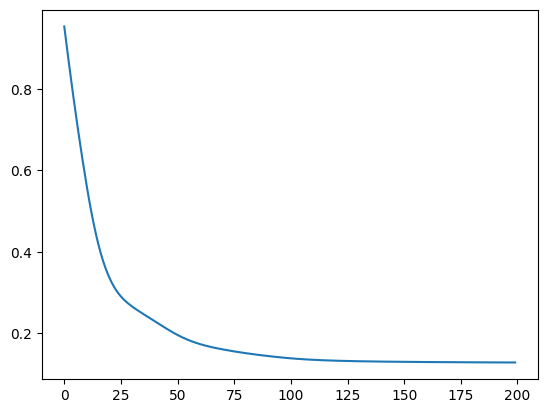

In [110]:
# TODO
# (1) Split data
# (2) Preprocess data
# (3) Train regression model
# (4) Predict validation dataset's answer, calculate MAPE comparing to the ground truth
# (5) Make prediction of testing dataset and store the values in output_datalist
from itertools import product

p_seed = [143106398]
p_learning_rate = [1e-2, 1e-4, 5e-5]
p_batch_size = [2000]
p_split_ratio = [0.3, 0.5, 0.7]
p_degree = [3]

for seed, learning_rate, batch_size, split_ratio, degree in list(
    product(p_seed, p_learning_rate, p_batch_size, p_split_ratio, p_degree)
)[0:1]:
    print(f"====={seed}_{learning_rate}_{batch_size}_{split_ratio}_{degree}=====")

    preprocessed_training_datalist = PreprocessDataAdvance(training_datalist, drop=False, ignore_last=True)
    training_data, validation_data = SplitDataAdvance(
        preprocessed_training_datalist, split_ratio, random_seed=seed
    )

    print(f"{training_data=}")

    maep_record = []
    least_maep_w, w = RegressionAdvance(
        training_data,
        maep_record,
        l_rate=learning_rate,
        epoch=2_0000,
        degree=degree,
        batch_size=batch_size,
        random_sgd=False,
        random_seed=seed,
    )
    plt.plot(maep_record)

    valid_pred = MakePredictionAdvance(w, validation_data[:, :-1], degree)
    maep_val = maep(validation_data[:, -1], valid_pred)
    least_valid_pred = MakePredictionAdvance(least_maep_w, validation_data[:, :-1], degree)
    least_maep_val = maep(validation_data[:, -1], least_valid_pred)
    print(f"{valid_pred=}")
    print(f"{validation_data[:, -1]=}")
    print(f"{maep_val=}")

    print(f"FINAL: {w=}, {least_maep_w=}")
    # w = w * (origin_max - origin_min) + origin_min

    preprocessed_testing_datalist = PreprocessDataAdvance(testing_datalist)

    print(f"{preprocessed_testing_datalist=}")

    output_datalist = MakePredictionAdvance(w, preprocessed_testing_datalist, degree)
    least_output_datalist = MakePredictionAdvance(
        least_maep_w, preprocessed_testing_datalist, degree
    )

    output_datalist = np.array(output_datalist)
    least_output_datalist = np.array(least_output_datalist)
    # output_datalist = output_datalist * (origin_max - origin_min) + origin_min
    # least_output_datalist = least_output_datalist * (origin_max - origin_min) + origin_min


    combination_name = f"__lastest__{seed}_{learning_rate}_{batch_size}_{split_ratio}_{degree}__{maep_val}.csv"
    least_combination_name = f"__least__{seed}_{learning_rate}_{batch_size}_{split_ratio}_{degree}__{least_maep_val}.csv"

    check = input()
    if not check:
        continue

    with open(
        output_dataroot + combination_name, "w", newline="", encoding="utf-8"
    ) as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Id", "gripForce"])
        for i in range(len(output_datalist)):
            writer.writerow([i, output_datalist[i]])
    with open(
        output_dataroot + least_combination_name, "w", newline="", encoding="utf-8"
    ) as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Id", "gripForce"])
        for i in range(len(least_output_datalist)):
            writer.writerow([i, least_output_datalist[i]])

# Save the Code File
Please save your code and submit it as an ipynb file! (**Lab1.ipynb**)